In [18]:
# ЛАБ 8

from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp, NMF, KNNBasic
import matplotlib.pyplot as plt

data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()

raw_data = data.raw_ratings
for i in range(5):  
    print(raw_data[i])
    

('196', '242', 3.0, '881250949')
('186', '302', 3.0, '891717742')
('22', '377', 1.0, '878887116')
('244', '51', 2.0, '880606923')
('166', '346', 1.0, '886397596')


In [19]:
algorithms = [SVD(), SVDpp(), NMF(), KNNBasic(sim_options={'name': 'cosine', 'user_based': True}), KNNBasic(sim_options={'name': 'cosine', 'user_based': False})]


rmse_scores = []
for algorithm in algorithms:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    rmse_scores.append(results['test_rmse'].mean())


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


RMSE for <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000029C51388D90>: 0.9359514645393112
RMSE for <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x0000029C51389180>: 0.9181937154077373
RMSE for <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x0000029C513880A0>: 0.9632812305411708
RMSE for <surprise.prediction_algorithms.knns.KNNBasic object at 0x0000029C4B26F4F0>: 1.0170300279714795
RMSE for <surprise.prediction_algorithms.knns.KNNBasic object at 0x0000029C50142890>: 1.027505044493771

Найкращий алгоритм: <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x0000029C51389180> з RMSE: 0.9181937154077373


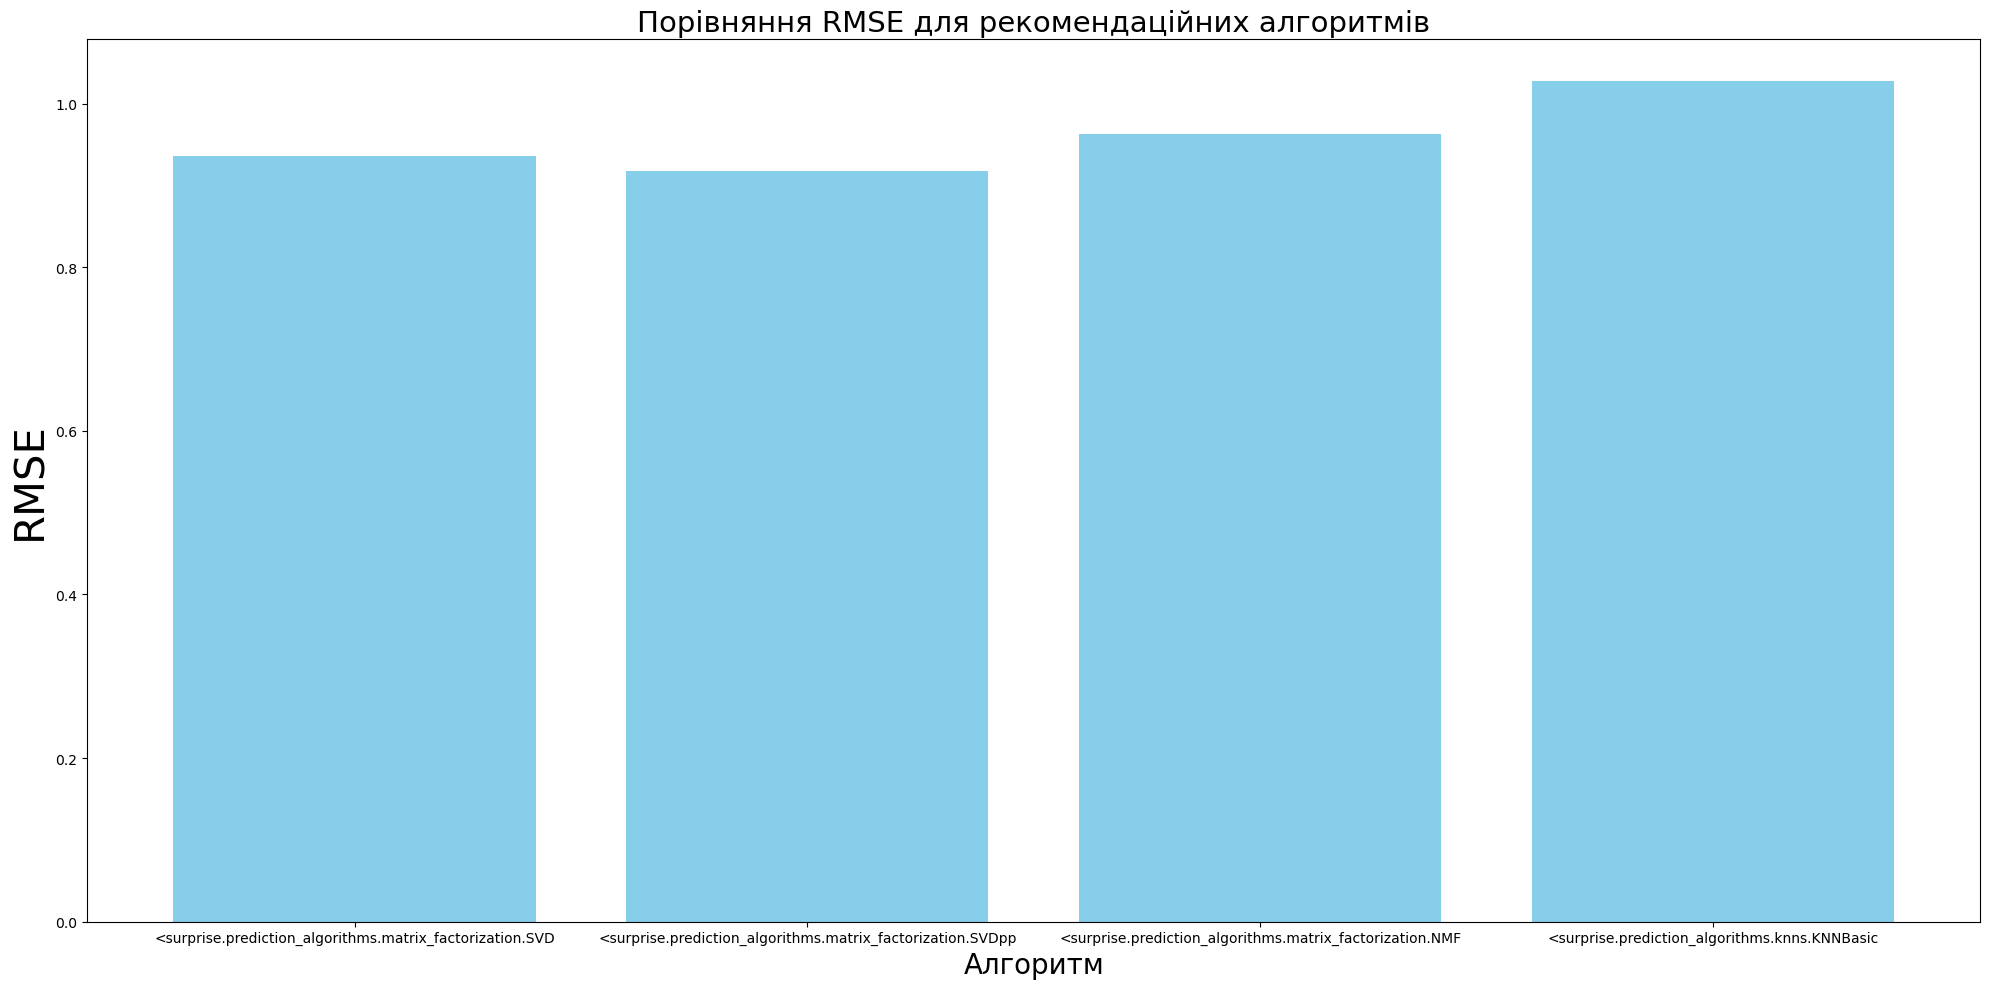

In [20]:
best_algorithm = algorithms[rmse_scores.index(min(rmse_scores))]


for i, algorithm in enumerate(algorithms):
    print(f'RMSE for {algorithm}: {rmse_scores[i]}')
    
print(f'\nНайкращий алгоритм: {best_algorithm} з RMSE: {min(rmse_scores)}')

plt.figure(figsize=(20, 10))
plt.bar([str(algorithm).split(' ')[0] for algorithm in algorithms], rmse_scores, color='skyblue')
plt.xlabel('Алгоритм', fontsize=20)
plt.ylabel('RMSE', fontsize=30)
plt.title('Порівняння RMSE для рекомендаційних алгоритмів', fontsize=21)
plt.tight_layout()
plt.show()
